<a href="https://colab.research.google.com/github/Otsemeuno/accident_data_brim/blob/main/BigDataGroupwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Accident, Vehicle and Casualty Data**

# Table of Contents


*   **Business Objective**
*   **Introduction**
*   **Importing Necessary Libraries and Preparing Enviroment**
*    **Data Preparation**



> *

*   List item
*   List item









 






    - ##### Loading the Data
    - ##### Selecting Important Variables
    - ##### Merging Dataset
    - ##### Types of the Variables
    - ##### Data Splitting
    - ##### Recoding Missing Values
    - ##### Imputing Missing Values
    - ##### Recoding Categorical Variables
    - ##### Feature Engineering the Data
- ### Second Analysis for Severity
- ### Descriptive Statistics and Visualization
     - ##### Descriptive Analysis for the Week Day Variable
     - ##### Descriptive Analysis for the Road Type Variable
     - ##### Descriptive Analysis for the Pedestrian Crossing Physical Facilities Variable
     - ##### Descriptive Analysis for the Weather Condition Variable
     - ##### Descriptive Analysis for the Road Surface Variable
     - ##### Descriptive Analysis for the Urban or Rural Area Variable
     - ##### Descriptive Analysis for the Driver's Gender Variable
     - ##### Descriptive Analysis for the Time Category Variable
     - ##### Descriptive Analysis for the Number of Accidents Variable
     - ##### Distribution of Numerical Variables in the Accident Severity Data
     - ##### Distribution of Categorical Variables in the Accident Severity Data
- ### Variable Correlations
- ### Copying the Data

## **Business Objective**
The United Kingdom has the second safest roads in Europe according to European Automobile Manufacturers Association (ACEA) yet every 22 minutes someone is killed or seriously injured on UK roads(William Joseph). Every road accident is preventable but to begin to understand how to prevent road accidents there is a need to know why they happen. 
We are building two models, one that will indicate the main determinants of road accidents in a day in the UK and the other will highlight the factors contributing to the severity of those accidents. The department of transport will use this insight to formulate policies to curb or reduce the occurrence of road accidents.
The first model will use the number of accidents in a day as the dependent variable while the second model will use casualty severity as its' dependent variable, both models will make use of information about specific accidents as the independent variables.

## **Introduction**
In this report, the purpose of accident data analysis is to identify major causes of accidents and if possible suggest effective policies to the UK Department for Transport.

In this report, we are preprocessing and analysing data on acidents that occured in the UK in 2020. The data was collected from the UK Department for Transport,  https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data. 

The aim of this report is to clean the data, gain insights that can help identify major causes of accidents and make it suitable for machine learning modeling.



### **Importing Necessary Libraries and Preparing Enviroment**

In [ ]:
#Importing necesssary libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

from google.colab import drive

#suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#To check the runtime of each command
def time_step(fn):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = fn(*args, **kwargs)
    end_time = time.time()
    time_taken = round(end_time - start_time, 4)
    if time_taken < 60:
      print(f'{fn.__name__} took {time_taken} seconds to run')
    else :
      print(f'{fn.__name__} took {time_taken/60} minutes to run')
    return result
  return wrapper

## **Data Preparation**


### **Loading the Data**

Three files were imported from the <a href = 'https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data'>Department for Transport</a>. They contain data on the accidents, casualities and vehicles.


In [ ]:
# Mount Google Drive on Kernel
drive.mount('/content/drive')

# loading the datasets using pandas into:

#df_accident for the 2020 accident data
df_accident = pd.read_csv(
    '/content/drive/MyDrive/dft-road-casualty-statistics-accident-2020.csv')

#df_casualty for the 2020 accident casualties data
df_casualty = pd.read_csv(
    '/content/drive/MyDrive/dft-road-casualty-statistics-casualty-2020.csv')

#df_vehicle for the 2020 accident vehicle data
df_vehicle = pd.read_csv(
    '/content/drive/MyDrive/dft-road-casualty-statistics-vehicle-2020.csv')

Mounted at /content/drive


In [ ]:
#displaying the first five rows of the 2020 accident data
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
#displaying the shape of the 2020 accident data
df_accident.shape

(91199, 36)

The accident data has 91,199 rows and 36 columns.

In [ ]:
#displaying the first five rows of the 2020 accident casualties data
df_casualty.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


In [ ]:
#displaying the shape of the 2020 accident casualties data
df_casualty.shape

(115584, 18)

The accident casualty data has 115,584 rows and 18 columns.

In [ ]:
#displaying the first five rows of the 2020 accident vehicle data
df_vehicle.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,10219808,1,9,9,5,1,5,0,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,10220496,1,9,0,4,2,6,0,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010228005,2020,10228005,1,9,0,18,-1,-1,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2020010228006,2020,10228006,1,8,0,18,1,5,0,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,2020010228011,2020,10228011,1,9,0,18,3,7,9,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [ ]:
#displaying the shape of the 2020 accident vehicle data
df_vehicle.shape

(167375, 27)

The accident vehicle data has 167,375 rows and 27 columns.

### **Selecting Important Variables**

The variables/columns important to our analysis are extracted from the accident, accident casualties and accident vehicle datasets.

In [ ]:
#the columns from the accident dataframe, df_accident, that are important to the
# analysis are extracted to the df_a dataframe
df_a = df_accident[['accident_index','date', 'day_of_week', 'time', 'road_type',
                    'pedestrian_crossing_physical_facilities',
                    'weather_conditions', 'road_surface_conditions', 
                    'urban_or_rural_area']]

#the columns from the accident casualty dataframe, df_casualty, that are 
#important to the analysis are extracted to the df_c dataframe
df_c = df_casualty[['accident_index', 'casualty_severity', 'casualty_class']]

#the columns from the accident vehicle dataframe, df_vehicle, that are important 
#to the analysis are extracted to the df_v dataframe
df_v = df_vehicle[['accident_index','age_of_driver', 'sex_of_driver', 
                   'age_of_vehicle']]

In [ ]:
#displaying the first five rows of the df_a dataset
df_a.head()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area
0,2020010219808,04/02/2020,3,09:00,6,9,9,9,1
1,2020010220496,27/04/2020,2,13:55,6,4,1,1,1
2,2020010228005,01/01/2020,4,01:25,6,0,1,2,1
3,2020010228006,01/01/2020,4,01:50,6,4,1,1,1
4,2020010228011,01/01/2020,4,02:25,6,0,1,1,1


In [ ]:
#displaying the first five rows of the df_c dataset
df_c.head()

,accident_index,casualty_severity,casualty_class
0,2020010219808,3,3
1,2020010220496,3,3
2,2020010220496,3,3
3,2020010228005,3,3
4,2020010228006,2,3


In [ ]:
#displaying the first five rows of the df_v dataset
df_v.head()

,accident_index,age_of_driver,sex_of_driver,age_of_vehicle
0,2020010219808,32,2,6
1,2020010220496,45,1,2
2,2020010228005,-1,3,-1
3,2020010228006,44,1,8
4,2020010228011,20,1,4


### **Merging Datasets**



Merged the df_a and the df_v dataframes using the accident index and removed duplicates

In [ ]:
#merged the accident data, df_a and the accident vehicle data, df_v using the
# accident index
df = df_a.merge(df_v, left_on = 'accident_index', right_on = 'accident_index')

#checking for duplicates in the dataframe
df.duplicated().sum()

813

There are 813 duplicates in the df dataframe

In [ ]:
#the duplicates in the df dataframe are removed
df = df.drop_duplicates()

#displaying the shape of the df dataframe
df.shape

(160674, 12)

The df dataframe has 160,674 rows and 12 columns

In [ ]:
#displaying the first five rows of the df dataset
df.head()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle
0,2020010219808,04/02/2020,3,09:00,6,9,9,9,1,32,2,6
1,2020010220496,27/04/2020,2,13:55,6,4,1,1,1,45,1,2
2,2020010228005,01/01/2020,4,01:25,6,0,1,2,1,-1,3,-1
3,2020010228006,01/01/2020,4,01:50,6,4,1,1,1,44,1,8
4,2020010228011,01/01/2020,4,02:25,6,0,1,1,1,20,1,4


Merged the df and the df_c dataframes on the accident index.
We did not remove duplicates because that will affect the number of casualties reported in the data.

In [ ]:
#merged the dataframe, df and the accident casualty data, df_c using the
# accident index
df_2 = df_c.merge(df, left_on = 'accident_index', right_on = 'accident_index')

In [ ]:
#displaying the shape of the df_2 dataframe
df_2.shape

(176061, 14)

The df_2 dataframe has 176,061 rows and 14
columns.

In [ ]:
#displaying the first five rows of the df_2 dataset
df_2.head()

,accident_index,casualty_severity,casualty_class,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle
0,2020010278554,2,1,09/11/2020,2,20:20,6,0,1,2,1,23,1,-1
1,2020010278554,2,1,09/11/2020,2,20:20,6,0,1,2,1,23,1,4
2,2020010278556,2,1,04/11/2020,4,11:50,6,9,1,9,1,17,1,4
3,2020010278556,2,1,04/11/2020,4,11:50,6,9,1,9,1,35,3,4
4,2020010278558,3,1,09/11/2020,2,19:31,2,5,1,2,1,45,1,0


### **Types of the variables**

There are four main datatypes: 
*   Categorical variables: The values indicate categories or labels.
*   Numerical variables: The values are numeric, and statistical operations can be carried out on them.
*   Boolean variables: The values indicate the presence or absence of the variable. 
*  Datetime: The values represent dates and time.

We checked the datatypes of the variables in the df and df_2 dataframes. If the variables are not in the right format, we change them to the correct format.

Checking the variables in the df dataframe

In [ ]:
#checking the types of the variables in the df dataframe to confirm if they are 
#in the right format
df.dtypes

accident_index                             object
date                                       object
day_of_week                                 int64
time                                       object
road_type                                   int64
pedestrian_crossing_physical_facilities     int64
weather_conditions                          int64
road_surface_conditions                     int64
urban_or_rural_area                         int64
age_of_driver                               int64
sex_of_driver                               int64
age_of_vehicle                              int64
dtype: object

It can be seen from the output of the code that the following variables are not in their correct format:

***date, time, road_type, pedestrian_crossing_physical_facilities, weather_conditions, road_surface_conditions, urban_or_rural_area and sex_of_driver.***

In [ ]:
#changing the datatypes of the categorical variables from int to objects using 
#.astype method
df['road_type'] = df['road_type'].astype(object)

df['pedestrian_crossing_physical_facilities'] = 
df['pedestrian_crossing_physical_facilities'].astype(object)

df['weather_conditions'] = df['weather_conditions'].astype(object)

df['road_surface_conditions'] = df['road_surface_conditions'].astype(object)

df['urban_or_rural_area'] = df['urban_or_rural_area'].astype(object)

df['sex_of_driver'] = df['sex_of_driver'].astype(object)

In [ ]:
#changing the datatypes of the datetime variables using the .to_datetime method 

#extracting the time from the .to_datetime method
df['time'] = pd.to_datetime(df['time']).dt.time
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#confirming if the datatypes of the variables are now in the right format
df.dtypes

accident_index                                     object
date                                       datetime64[ns]
day_of_week                                         int64
time                                               object
road_type                                          object
pedestrian_crossing_physical_facilities            object
weather_conditions                                 object
road_surface_conditions                            object
urban_or_rural_area                                object
age_of_driver                                       int64
sex_of_driver                                      object
age_of_vehicle                                      int64
dtype: object

Checking the variables in the df_2 dataframe.

In [ ]:
#checking the types of the variables in the df_2 dataframe to confirm if they are 
#in the right format
df_2.dtypes

accident_index                             object
casualty_severity                           int64
casualty_class                              int64
date                                       object
day_of_week                                 int64
time                                       object
road_type                                   int64
pedestrian_crossing_physical_facilities     int64
weather_conditions                          int64
road_surface_conditions                     int64
urban_or_rural_area                         int64
age_of_driver                               int64
sex_of_driver                               int64
age_of_vehicle                              int64
dtype: object

It can be seen from the output of the code that the following variables are not in their correct format: 

***casualty_severity, casualty_class, date, time, road_type, pedestrian_crossing_physical_facilities, weather_conditions, road_surface_conditions, urban_or_rural_area and sex_of_driver.*** 

In [ ]:
#changing the datatypes of the categorical variables from int to objects using 
#.astype method
df_2['casualty_severity'] = df_2['casualty_severity'].astype(object)

df_2['casualty_class'] = df_2['casualty_class'].astype(object)

df_2['road_type'] = df_2['road_type'].astype(object)

df_2['pedestrian_crossing_physical_facilities'] = 
df_2['pedestrian_crossing_physical_facilities'].astype(object)

df_2['weather_conditions'] = df_2['weather_conditions'].astype(object)

df_2['road_surface_conditions'] = df_2['road_surface_conditions'].astype(object)

df_2['urban_or_rural_area'] = df_2['urban_or_rural_area'].astype(object)

df_2['sex_of_driver'] = df_2['sex_of_driver'].astype(object)

In [ ]:
#changing the datatypes of the datetime variables using the .to_datetime method 

#extracting the time from the .to_datetime method
df_2['time'] = pd.to_datetime(df_2['time']).dt.time
df_2['date'] = pd.to_datetime(df_2['date'])

In [ ]:
#confirming if the datatypes of the variables are now in the right format
df_2.dtypes

accident_index                                     object
casualty_severity                                  object
casualty_class                                     object
date                                       datetime64[ns]
day_of_week                                         int64
time                                               object
road_type                                          object
pedestrian_crossing_physical_facilities            object
weather_conditions                                 object
road_surface_conditions                            object
urban_or_rural_area                                object
age_of_driver                                       int64
sex_of_driver                                      object
age_of_vehicle                                      int64
dtype: object

### **Data Splitting**

The dataframe, df, is split into training and testing set. The training set is 80% of the data while the testing set is 20% of the data.
The data isn't shuffled while splitting because the data will be grouped by date later.

Since the data will be grouped by date later, we realized we could not aggregate the age of the driver and the age of the vehicle as they are continous and finding the average or median of the data would make the result of our analysis bias towards a certain age range, hence it would not be a good representation of the population.

At this point, we have to drop the age of driver and the age of the vehicle. 


In [ ]:
#dropping the age of driver, age of the vehicle 
df = df.drop(['age_of_driver', 'age_of_vehicle'], axis = 1)

In [ ]:
#the dataframe, df, is sorted by the date and time of the accident
df = df.sort_values(['date', 'time'])

#the data is split in a 80:20 ratio to the trainset and testset 
#the data is not shuffled and random state is set to 3
trainset, testset = train_test_split(df, test_size = 0.20, random_state = 3, 
                                     shuffle = False)

In [ ]:
#displaying the last five rows of the trainset data
trainset.tail()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,sex_of_driver
106766,2020410992262,2020-10-16,6,06:32:00,6,0,1,1,1,1
29880,2020010274058,2020-10-16,6,06:38:00,6,9,1,1,1,2
29881,2020010274058,2020-10-16,6,06:38:00,6,9,1,1,1,3
29868,2020010274042,2020-10-16,6,06:40:00,3,0,1,1,1,1
29869,2020010274042,2020-10-16,6,06:40:00,3,0,1,1,1,1


It can be seen from the tail of the trainset that the data contains data on accidents up till 2020-10-16, 06:40am.

This means that when we are grouping by days later, the data for 2020-10-16 won't be complete for either the training or testing data.

Therefore, we moved all data for 2020-10-16 present in the training data to the testing data.

In [ ]:
#appending the accident data for 2020-10-16 present in the training data
# to the testing data
testset = testset.append(trainset[trainset['date'] == 2020-10-16], 
                         ignore_index = True)

#removing the accident data for 2020-10-16 present in the training data
trainset.drop(trainset[trainset['date'] >= '2020-10-16'].index, inplace = True)

In [ ]:
#displaying the last five rows of the training data to confirm if
# the accident data for 2020-10-16 has been removed
trainset.tail()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,sex_of_driver
92012,2020320544890,2020-10-15,5,23:34:00,6,0,2,2,2,1
92013,2020320544890,2020-10-15,5,23:34:00,6,0,2,2,2,1
132193,2020460993741,2020-10-15,5,23:47:00,3,0,1,1,2,1
132194,2020460993741,2020-10-15,5,23:47:00,3,0,1,1,2,1
62215,2020137AF2048,2020-10-15,5,23:55:00,6,0,1,2,2,1


### **Recoding Missing values**

The missing values in the trainset are represented by 9 or -1.

In [ ]:
#we recoded the missing values for the trainset by replacing 9 and -1 to nan

#we used a for loop to iterate over the columns in the trainset and
#replaced 9 and -1 with nan.
for i in trainset.columns:
  trainset[i] = trainset[i].replace({
      9: np.nan,
      -1: np.nan
  })

In [ ]:
#we recoded the missing values for the testset by replacing 9 and -1 to nan

#we used a for loop to iterate over the columns in the testset and
#replace 9 and -1 with nan.
for i in testset.columns:
  testset[i] = testset[i].replace({
      9: np.nan,
      -1: np.nan
  })

### **Imputing Missing Values**

In [ ]:
#checking for the columns that have missing values in the trainset
trainset.isna().any()

accident_index                             False
date                                       False
day_of_week                                False
time                                       False
road_type                                   True
pedestrian_crossing_physical_facilities     True
weather_conditions                          True
road_surface_conditions                     True
urban_or_rural_area                        False
sex_of_driver                               True
dtype: bool

All columns with null values are categorical variables. The categorical variables are: 

***road_type, pedestrian_crossing_physical_facilities, weather_conditions, road_surface_conditions and sex_of_driver.***

We impute this missing values using the KNNimputer from sklearn.

To use KNN imputation we have to input the column in KNNimputer with a range of value, each value representing a category.

In [ ]:
#checking the order of the categories of the road_type variable
trainset['road_type'].value_counts()

6.0    93268
3.0    19683
1.0     8128
2.0     2551
7.0     2134
Name: road_type, dtype: int64

In [ ]:
#changing the category 6 and 7 to 4 and 5 respectively
trainset['road_type'] = trainset['road_type'].replace({
    6: 4,
    7: 5
})

In [ ]:
#checking the order of the categories of the 
#pedestrian_crossing_physical_facilities variable
trainset['pedestrian_crossing_physical_facilities'].value_counts()

0.0    98706
5.0    10487
4.0     6403
1.0     5019
8.0     3307
7.0      299
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [ ]:
#changing the category 4, 5, 7 and 8 to 2, 3, 4 and 5 respectively
trainset['pedestrian_crossing_physical_facilities'] = 
trainset['pedestrian_crossing_physical_facilities'].replace({
    4: 2,
    5: 3,
    7: 4,
    8: 5
})

In [ ]:
#checking the order of the categories of the weather_conditions variable
trainset['weather_conditions'].value_counts()

1.0    102373
2.0     14497
8.0      3477
5.0      2163
4.0      1950
7.0       595
3.0       175
6.0        92
Name: weather_conditions, dtype: int64

In [ ]:
#checking the order of the categories of the road_surface_conditions variable
trainset['road_surface_conditions'].value_counts()

1.0    93620
2.0    32181
4.0      798
5.0      173
3.0      159
Name: road_surface_conditions, dtype: int64

In [ ]:
#checking the order of the categories of the sex_of_driver variable
trainset['sex_of_driver'].value_counts()

1.0    81815
2.0    32265
3.0    14406
Name: sex_of_driver, dtype: int64

In [ ]:
#setting the hyperparameters of the imputer by setting the number of 
#neighbours to 2
imputer = KNNImputer(n_neighbors=2)

#fitting the KNNimputer on the trainset and transforming the trainset 
#using the imputer
trainset[['road_type', 'pedestrian_crossing_physical_facilities', 
    'weather_conditions','road_surface_conditions', 'urban_or_rural_area', 
    'sex_of_driver' ]] = imputer.fit_transform(trainset[['road_type', 
                                    'pedestrian_crossing_physical_facilities', 
                                    'weather_conditions','road_surface_conditions', 
                                    'urban_or_rural_area', 'sex_of_driver' ]])

In [ ]:
#rounding up the KNNimputation values
trainset['road_type'] = trainset['road_type'].apply(np.ceil)

trainset['pedestrian_crossing_physical_facilities'] = 
trainset['pedestrian_crossing_physical_facilities'].apply(np.ceil)

trainset['weather_conditions'] = trainset['weather_conditions'].apply(np.ceil)

trainset['road_surface_conditions'] = 
trainset['road_surface_conditions'].apply(np.ceil)

trainset['sex_of_driver'] = trainset['sex_of_driver'].apply(np.ceil)

In [ ]:
#confirming if the columns still have missing values 
trainset.isna().any()

accident_index                             False
date                                       False
day_of_week                                False
time                                       False
road_type                                  False
pedestrian_crossing_physical_facilities    False
weather_conditions                         False
road_surface_conditions                    False
urban_or_rural_area                        False
sex_of_driver                              False
dtype: bool

All the null values have been imputed using the KNNimputer

In [ ]:
#Imputing missing values in testset

#changing the category 6 and 7 to 4 and 5 respectively
testset['road_type'] = testset['road_type'].replace({
    6: 4,
    7: 5
})

#changing the category 4, 5, 7 and 8 to 2, 3, 4 and 5 respectively
testset['pedestrian_crossing_physical_facilities'] = 
testset['pedestrian_crossing_physical_facilities'].replace({
    4: 2,
    5: 3,
    7: 4,
    8: 5
})

#transforming the testset by using the Imputer fitted on the training data
testset[['road_type', 'pedestrian_crossing_physical_facilities', 
    'weather_conditions','road_surface_conditions', 'urban_or_rural_area', 
    'sex_of_driver' ]] = 
    imputer.transform(testset[['road_type', 'pedestrian_crossing_physical_facilities', 
    'weather_conditions','road_surface_conditions', 'urban_or_rural_area', 
    'sex_of_driver' ]])

#rounding up the KNNimputation values
testset['road_type'] = testset['road_type'].apply(np.ceil)

testset['pedestrian_crossing_physical_facilities'] = 
testset['pedestrian_crossing_physical_facilities'].apply(np.ceil)

testset['weather_conditions'] = testset['weather_conditions'].apply(np.ceil)

testset['road_surface_conditions'] = 
testset['road_surface_conditions'].apply(np.ceil)

testset['sex_of_driver'] = testset['sex_of_driver'].apply(np.ceil)

### **Recoding Categorical Variables**

In [ ]:
#checking for the unique categories of the road_type variable
trainset['road_type'].value_counts()

4.0    95141
3.0    20195
1.0     8181
2.0     2725
5.0     2256
Name: road_type, dtype: int64

In [ ]:
#putting labels for the road_type variable
trainset['road_type'] = trainset['road_type'].replace({
    1: 'roundabout',
    2:'one_way_street',
    3:'dual_carriageway',
    4:'single_carriageway',
    5:'slip_road'
})

In [ ]:
#checking for the unique categories of the 
#pedestrian_crossing_physical_facilities variable
trainset['pedestrian_crossing_physical_facilities'].value_counts()

0.0    99850
3.0    10676
2.0     8910
1.0     5456
5.0     3307
4.0      299
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [ ]:
#putting labels for the pedestrian_crossing_physical_facilities variable
trainset['pedestrian_crossing_physical_facilities'] = 
trainset['pedestrian_crossing_physical_facilities'].replace({
    0: 'no_crossing_facilities',
    1:'zebra',
    2:'non_junction_crossing',
    3:'pedestrian_phase',
    4:'footbridge',
    5:'central_refuge'
})

In [ ]:
#checking for the unique categories of the weather_conditions variable
trainset['weather_conditions'].value_counts()

1.0    105134
2.0     14592
8.0      3552
5.0      2242
4.0      2073
7.0       630
3.0       183
6.0        92
Name: weather_conditions, dtype: int64

In [ ]:
#created the high_wind variable, It is a flag variable that 
#indidcates if its windy or not
# high winds, 
# no high winds
trainset['high_wind'] = trainset['weather_conditions']. replace({
    1: 'no_high_wind',
    2: 'no_high_wind',
    3: 'no_high_wind',
    4: 'high_wind',
    5: 'high_wind',
    6: 'high_wind',
    7: 'no_high_wind',
    8: 'no_high_wind'
})

In [ ]:
#putting labels for the weather_conditions variable
trainset['weather_conditions'] = trainset['weather_conditions'].replace({
  1: 'fine',
    2:'rainy',
    3:'snow',
    4:'fine',
    5:'rainy',
    6:'snow',
    7:'fog',
    8:'other'
})

In [ ]:
#checking for the unique categories of the sex_of_driver variable
trainset['sex_of_driver'].value_counts()

1.0    81819
2.0    32273
3.0    14406
Name: sex_of_driver, dtype: int64

In [ ]:
#putting labels for the sex_of_driver variable
trainset['sex_of_driver'] = trainset['sex_of_driver'].replace({ 
    1: 'male',
    2:'female',
    3:'other'
})

In [ ]:
#checking for the unique categories of the road_surface_conditions variable
trainset['road_surface_conditions'].value_counts()

1.0    94407
2.0    32960
4.0      798
5.0      173
3.0      160
Name: road_surface_conditions, dtype: int64

In [ ]:
#putting labels for the road_surface_conditions variable
#merged the categories 3 (snow) and 4 (Frost) because the number of 
#category 3(snow) is small
trainset['road_surface_conditions'] = 
trainset['road_surface_conditions'].replace({
    1: 'dry',
    2:'wet',
    3:'frost',
    4:'frost',
    5:'flood'
})

In [ ]:
#checking for the unique categories of the urban_or_rural_area variable
trainset['urban_or_rural_area'].value_counts()

1.0    86759
2.0    41721
3.0       18
Name: urban_or_rural_area, dtype: int64

In [ ]:
#putting labels for the urban_or_rural_area variable
#merged the categories 2 (Rural) and 3 (Unallocated) because we are assuming 
#category 3(Unallocated) to be rural
trainset['urban_or_rural_area'] = trainset['urban_or_rural_area']. replace({
    1: 'urban',
    2: 'rural',
    3: 'rural'
})

In [ ]:
#putting labels for the categorical variables in the testset

#putting labels for the road_type variable
testset['road_type'] = testset['road_type'].replace({
    1: 'roundabout',
    2:'one_way_street',
    3:'dual_carriageway',
    4:'single_carriageway',
    5:'slip_road'
})

#putting labels for the pedestrian_crossing_physical_facilities variable
testset['pedestrian_crossing_physical_facilities'] = 
testset['pedestrian_crossing_physical_facilities'].replace({
    0: 'no_crossing_facilities',
    1:'zebra',
    2:'non_junction_crossing',
    3:'pedestrian_phase',
    4:'footbridge',
    5:'central_refuge'
})

#putting labels for the sex_of_driver variable
testset['sex_of_driver'] = testset['sex_of_driver'].replace({ 
    1: 'male',
    2:'female',
    3:'other'
})

#putting labels for the road_surface_conditions variable
#merged the categories 3 (snow) and 4 (Frost) 
testset['road_surface_conditions'] = 
testset['road_surface_conditions'].replace({
    1: 'dry',
    2:'wet',
    3:'frost',
    4:'frost',
    5:'flood'
})

#created the high_wind variable, It is a flag variable that indidcates 
#if its windy or not
# high winds, 
# no high winds
testset['high_wind'] = testset['weather_conditions']. replace({
    1: 'no_high_wind',
    2: 'no_high_wind',
    3: 'no_high_wind',
    4: 'high_wind',
    5: 'high_wind',
    6: 'high_wind',
    7: 'no_high_wind',
    8: 'no_high_wind'
})

#putting labels for the weather_conditions variable
testset['weather_conditions'] = testset['weather_conditions'].replace({
    1: 'fine',
    2:'rainy',
    3:'snow',
    4:'fine',
    5:'rainy',
    6:'snow',
    7:'fog',
    8:'other'
})
#putting labels for the urban_or_rural_area variable
#merged the categories 2 (Rural) and 3 (Unallocated) 
testset['urban_or_rural_area'] = testset['urban_or_rural_area']. replace({
    1: 'urban',
    2: 'rural',
    3: 'rural'
})

### **Feature Engineering**

In [ ]:
#we created the target variable, no of accidents in a day 
#So that when the data is grouped by date, the no of accidents will be summed up 
trainset['no_of_accidents'] = 1
testset['no_of_accidents'] = 1

In [ ]:
#checking to see if the No_of_accidents variable has been created
trainset.head()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,sex_of_driver,high_wind,no_of_accidents
56360,2020122000307,2020-01-01,4,00:01:00,single_carriageway,no_crossing_facilities,fine,dry,urban,male,no_high_wind,1
71250,2020200921234,2020-01-01,4,00:05:00,single_carriageway,no_crossing_facilities,fine,dry,rural,male,no_high_wind,1
89833,202031D099520,2020-01-01,4,00:05:00,single_carriageway,pedestrian_phase,fine,dry,urban,other,no_high_wind,1
89834,202031D099520,2020-01-01,4,00:05:00,single_carriageway,pedestrian_phase,fine,dry,urban,male,no_high_wind,1
41799,2020052000009,2020-01-01,4,00:15:00,single_carriageway,no_crossing_facilities,fine,wet,urban,other,no_high_wind,1


In [ ]:
#created the timecategory variable from the time variable  
#using the lambda function the categories are :
#Morning, 1: 5:00am - 11:59am
#Afternoon, 2: 12:00pm - 4:59pm
#Evening, 3: 5:00pm - 8:59pm
#Night, 4: 9:00pm - 4:59am

#we use the apply method to create the timecategory variable
trainset['time_category'] = trainset.time.apply(lambda time: 1 
                                    if 5 <= time.hour <= 12 
                                    else 2 if 12 <= time.hour <= 17 
                                    else 3 if 17 <= time.hour <= 21 
                                    else 4)

testset['time_category'] = testset.time.apply(lambda time: 1 
                                    if 5 <= time.hour <= 12 
                                    else 2 if 12 <= time.hour <= 17 
                                    else 3 if 17 <= time.hour <= 21 
                                    else 4)


In [ ]:
#checking to see if the time_category variable has been created
trainset.tail()

,accident_index,date,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,sex_of_driver,high_wind,no_of_accidents,time_category
92012,2020320544890,2020-10-15,5,23:34:00,single_carriageway,no_crossing_facilities,rainy,wet,rural,male,no_high_wind,1,4
92013,2020320544890,2020-10-15,5,23:34:00,single_carriageway,no_crossing_facilities,rainy,wet,rural,male,no_high_wind,1,4
132193,2020460993741,2020-10-15,5,23:47:00,dual_carriageway,no_crossing_facilities,fine,dry,rural,male,no_high_wind,1,4
132194,2020460993741,2020-10-15,5,23:47:00,dual_carriageway,no_crossing_facilities,fine,dry,rural,male,no_high_wind,1,4
62215,2020137AF2048,2020-10-15,5,23:55:00,single_carriageway,no_crossing_facilities,fine,wet,rural,male,no_high_wind,1,4


In [ ]:
#Trainset for datavisualization
trainset2 = trainset

In [ ]:
#Created a function to create dummy variables
def create_dummies(trainset, testset, col_name):
    """Given a trainset, a testset, and the name of the column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
        
    # NOTE: not dropping the first value!
    # <<<
    one_hot_encoder = OneHotEncoder(drop=None, sparse=False)
    # >>>
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2d
    cat_vals = trainset[col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list
    # <<<
    new_col_names = one_hot_encoder.categories_[0].tolist()
    # >>>
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset

In [ ]:
#Used the create_dummies function to create dummies for each categorical 
#variable with more than two categories

trainset, testset = create_dummies(trainset, testset, 'road_type')
trainset, testset = create_dummies(trainset, testset,
                                   'pedestrian_crossing_physical_facilities')
trainset, testset = create_dummies(trainset, testset, 'weather_conditions')
trainset, testset = create_dummies(trainset, testset, 'road_surface_conditions')
trainset, testset = create_dummies(trainset, testset, 'time_category')
trainset, testset = create_dummies(trainset, testset, 'sex_of_driver')

#Used the pandas .get_dummies function to create dummies for each categorical 
#variable with two categories
trainset['no_high_wind']= pd.get_dummies(trainset['high_wind'], drop_first=True)
testset['no_high_wind']= pd.get_dummies(testset['high_wind'], drop_first=True)
trainset['urban_area']= pd.get_dummies(trainset['urban_or_rural_area'], 
                                       drop_first=True)
testset['urban_area']= pd.get_dummies(testset['urban_or_rural_area'], 
                                      drop_first=True)

In [ ]:
#dropping the categorical variables because we have created 
#dummy variables for the categories
trainset = trainset.drop(['accident_index', 'road_type', 
                          'pedestrian_crossing_physical_facilities', 
                          'weather_conditions','road_surface_conditions', 
                          'urban_or_rural_area', 'sex_of_driver', 
                          'time_category'], axis = 1)


testset = testset.drop(['accident_index', 'road_type',
                        'pedestrian_crossing_physical_facilities', 
                        'weather_conditions','road_surface_conditions', 
                        'urban_or_rural_area', 'sex_of_driver',
                        'time_category'], axis = 1)


In [ ]:
#confirming the categorical values have been removed
trainset.head()

,date,day_of_week,time,high_wind,no_of_accidents,dual_carriageway,one_way_street,roundabout,single_carriageway,slip_road,...,frost,wet,1,2,3,4,female,male,no_high_wind,urban_area
56360,2020-01-01,4,00:01:00,no_high_wind,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
71250,2020-01-01,4,00:05:00,no_high_wind,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
89833,2020-01-01,4,00:05:00,no_high_wind,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
89834,2020-01-01,4,00:05:00,no_high_wind,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
41799,2020-01-01,4,00:15:00,no_high_wind,1,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1


In [ ]:
#grouping the data by date
trainset = trainset.groupby('date').sum()

#reseting the index to default
trainset = trainset.reset_index()

#changing the value of the day_of_the_week variable because the groupby method
# summed it up
trainset['day_of_week'] = trainset['date'].dt.day_of_week
#where Monday is 0, Tuesday is 1, Wednesday is 2, Thursday is 3
#Friday is 4, Sunday is 5 and Sunday is 6


In [ ]:
#checking the trainset to see if the data is grouped by date
#and if the values of the day_of_the_week variable has been updated
trainset.head()

,date,day_of_week,no_of_accidents,dual_carriageway,one_way_street,roundabout,single_carriageway,slip_road,central_refuge,footbridge,...,frost,wet,1,2,3,4,female,male,no_high_wind,urban_area
0,2020-01-01,2,327,61.0,9.0,20.0,227.0,10.0,15.0,0.0,...,0.0,101.0,77.0,80.0,60.0,110.0,67.0,210.0,325.0,244.0
1,2020-01-02,3,523,83.0,7.0,26.0,401.0,6.0,11.0,0.0,...,0.0,115.0,134.0,186.0,125.0,78.0,134.0,330.0,490.0,365.0
2,2020-01-03,4,423,72.0,13.0,28.0,304.0,6.0,5.0,2.0,...,1.0,101.0,119.0,160.0,82.0,62.0,99.0,270.0,395.0,282.0
3,2020-01-04,5,143,24.0,4.0,11.0,104.0,0.0,3.0,0.0,...,0.0,8.0,45.0,49.0,42.0,7.0,27.0,98.0,143.0,112.0
4,2020-01-05,6,273,38.0,1.0,28.0,204.0,2.0,6.0,0.0,...,1.0,64.0,95.0,110.0,50.0,18.0,65.0,185.0,271.0,204.0


In [ ]:
#grouping the data by date
testset = testset.groupby('date').sum()

#reseting the index to default
testset = testset.reset_index()

#changing the value of the day_of_the_week variable because the groupby method 
#summed it up
testset['day_of_week'] = testset['date'].dt.day_of_week

In [ ]:
#Creating functions that normalize the counts of categories for each variable 
#so as to convert it to percentage
def timecategory(row):
  """The function takes a dataset as the input and it checks for the categories
  of the time_category variable and replaces the values of each dummy variable 
  created for the variable with it proportion.
  """
  m = row[1]
  a = row[2]
  e = row[3]
  n = row[4]

  total = m + a + e + n
  row[1] = m/total
  row[2] = a/total
  row[3] = e/total
  row[4] = n/total
  return row

def roadtype(row):
  """The function takes a dataset as the input and it checks for the categories
  of the roadtype variable and replaces the values of each dummy variable 
  created for the variable with it proportion.
  """
  r = row['roundabout']
  o = row['one_way_street']
  d = row['dual_carriageway']
  s = row['single_carriageway']
  sr = row['slip_road']

  total = r + o + d + s + sr
  row['roundabout'] = r/total
  row['one_way_street'] = o/total
  row['dual_carriageway'] = d/total
  row['single_carriageway'] = s/total
  row['slip_road'] = sr/total
  return row    

def pedestriancrossingfacilities(row):
  """The function takes a dataset as the input and it checks for the categories
  of the pedestriancrossingfacilities variable and replaces the values of each 
  dummy variable created for the variable with it proportion.
  """
  nc = row['no_crossing_facilities']
  z = row['zebra']
  n = row['non_junction_crossing']
  p = row['pedestrian_phase']
  f = row['footbridge']
  c = row['central_refuge']

  total = nc + z + n + p + f + c
  row['no_crossing_facilities'] = nc/total
  row['zebra'] = z/total
  row['non_junction_crossing'] = n/total
  row['pedestrian_phase'] = p/total
  row['footbridge'] = f/total
  row['central_refuge'] = c/total
  return row

def highwind(row):
  """The function takes a dataset as the input and it checks for 
  the no_high_wind category and replaces the value with its proportion.
  """
  n = row["no_high_wind"]
  no_of_accidents = row['no_of_accidents']
  row["no_high_wind"] = n/no_of_accidents
  return row

def weatherconditions(row):
  """The function takes a dataset as the input and it checks for the categories
  of the weatherconditions variable and replaces the values of each dummy
   variable created for the variable with it proportion.
  """
  f = row["fine"]
  r = row["rainy"]
  s = row["snow"]
  fo = row["fog"]
  total = f + r + s + fo
  row["fine"] = f/total
  row["rainy"] = r/total
  row["snow"] = s/total
  row["fog"] = fo/total
  return row

def roadconditions(row):
  """The function takes a dataset as the input and it checks for the categories
  of the roadconditions variable and replaces the values of each dummy variable 
  created for the variable with it proportion.
  """
  d = row["dry"]
  w = row["wet"]
  fr = row["frost"]
  fl = row["flood"]
  total = d + w + fr + fl
  row["dry"] = d/total
  row["wet"] = w/total
  row["frost"] = fr/total
  row["flood"] = fl/total
  return row

def gender(row):
  """The function takes a dataset as the input and it checks for the categories
  of the gender variable and replaces the values of each dummy variable 
  created for the variable with it proportion.
  """
  f = row["female"]
  m = row["male"]
  o = row["other"]
  total = f + m + o
  row["female"] = f/total
  row["male"] = m/total
  row["other"] = o/total
  return row

def urban_rural(row):
  """The function takes a datasetas the input and it checks for the urban_area
  category and replaces the value with its proportion.
  """
  u = row["urban_area"]
  no_of_accidents = row['no_of_accidents']
  row["urban_area"] = u/no_of_accidents
  return row

In [ ]:
#applying the functions created to normalize the counts of categories 
#for each variable
trainset = trainset.apply(timecategory, axis=1)
trainset = trainset.apply(roadtype, axis=1)
trainset = trainset.apply(pedestriancrossingfacilities, axis=1)
trainset = trainset.apply(highwind, axis=1)
trainset = trainset.apply(weatherconditions, axis=1)
trainset = trainset.apply(roadconditions, axis=1)
trainset = trainset.apply(gender, axis=1)
trainset = trainset.apply(urban_rural, axis=1)


In [ ]:
#checking the trainset to see if the values of the Dummy 
#variables has been updated
trainset.head()

,date,day_of_week,no_of_accidents,dual_carriageway,one_way_street,roundabout,single_carriageway,slip_road,central_refuge,footbridge,...,frost,wet,1,2,3,4,female,male,no_high_wind,urban_area
0,2020-01-01,2,327,0.186544,0.027523,0.061162,0.694190,0.030581,0.045872,0.000000,...,0.000000,0.308869,0.235474,0.244648,0.183486,0.336391,0.204893,0.642202,0.993884,0.746177
1,2020-01-02,3,523,0.158700,0.013384,0.049713,0.766730,0.011472,0.021033,0.000000,...,0.000000,0.219885,0.256214,0.355641,0.239006,0.149140,0.256214,0.630975,0.936902,0.697897
2,2020-01-03,4,423,0.170213,0.030733,0.066194,0.718676,0.014184,0.011820,0.004728,...,0.002364,0.238771,0.281324,0.378251,0.193853,0.146572,0.234043,0.638298,0.933806,0.666667
3,2020-01-04,5,143,0.167832,0.027972,0.076923,0.727273,0.000000,0.020979,0.000000,...,0.000000,0.055944,0.314685,0.342657,0.293706,0.048951,0.188811,0.685315,1.000000,0.783217
4,2020-01-05,6,273,0.139194,0.003663,0.102564,0.747253,0.007326,0.021978,0.000000,...,0.003663,0.234432,0.347985,0.402930,0.183150,0.065934,0.238095,0.677656,0.992674,0.747253


In [ ]:
#applying the functions created to normalize the counts of 
#categories for each variable
testset = testset.apply(timecategory, axis=1)
testset = testset.apply(roadtype, axis=1)
testset = testset.apply(pedestriancrossingfacilities, axis=1)
testset = testset.apply(highwind, axis=1)
testset = testset.apply(weatherconditions, axis=1)
testset = testset.apply(roadconditions, axis=1)
testset = testset.apply(gender, axis=1)
testset = testset.apply(urban_rural, axis=1)

## **Second Analysis for Severity**

In [ ]:
#the data is split in a 80:20 ratio to the trainset and testset 
#the data is not shuffled and random state is set to 3
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, 
                                             random_state = 3)

train_index, test_index = 
list(stratified_splitter.split(df_2, df_2['casualty_severity']))[0]
trainset_sev = df_2.loc[train_index]
testset_sev = df_2.loc[test_index]

In [ ]:
trainset_sev = trainset_sev.drop(['accident_index', 'date'], axis = 1)
testset_sev = testset_sev.drop(['accident_index', 'date'], axis = 1)

In [ ]:
trainset_sev.head()

,casualty_severity,casualty_class,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle
116740,3,1,7,17:29:00,1,0,1,1,1,31,1,-1
168857,3,1,7,11:13:00,3,4,1,1,2,58,2,-1
115780,3,1,3,19:01:00,6,0,1,1,1,-1,3,-1
75869,3,2,5,15:26:00,3,0,9,2,2,41,1,2
66321,2,1,4,14:43:00,6,0,1,1,2,27,1,6


In [ ]:
#we recoded the missing values for the trainset by replacing 9 and -1 to nan

#we used a for loop to iterate over the columns in the trainset and
#replaced 9 and -1 with nan.
for i in trainset_sev.columns:
  trainset_sev[i] = trainset_sev[i].replace({
      9: np.nan,
      -1: np.nan
  })

In [ ]:
for i in testset_sev.columns:
  testset_sev[i] = testset_sev[i].replace({
      9: np.nan,
      -1: np.nan
  })

In [ ]:
#checking for the columns that have missing values in the trainset
trainset_sev.isna().any()

casualty_severity                          False
casualty_class                             False
day_of_week                                False
time                                       False
road_type                                   True
pedestrian_crossing_physical_facilities     True
weather_conditions                          True
road_surface_conditions                     True
urban_or_rural_area                        False
age_of_driver                               True
sex_of_driver                              False
age_of_vehicle                              True
dtype: bool

In [ ]:
#checking the order of the categories of the road_type variable
trainset_sev['road_type'].value_counts()

6.0    104737
3.0     23704
1.0      7944
7.0      2217
2.0      1253
Name: road_type, dtype: int64

In [ ]:
#changing the category 6 and 7 to 4 and 5 respectively
trainset_sev['road_type'] = trainset_sev['road_type'].replace({
    6: 4,
    7: 5
})

In [ ]:
#checking the order of the categories of the 
#pedestrian_crossing_physical_facilities variable
trainset_sev['pedestrian_crossing_physical_facilities'].value_counts()

0.0    118170
5.0      8618
4.0      6076
1.0      3361
8.0      3297
7.0       285
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [ ]:
#changing the category 4, 5, 7 and 8 to 2, 3, 4 and 5 respectively
trainset_sev['pedestrian_crossing_physical_facilities'] =
 trainset_sev['pedestrian_crossing_physical_facilities'].replace({
    4: 2,
    5: 3,
    7: 4,
    8: 5
})

In [ ]:
#checking the order of the categories of the weather_conditions variable
trainset_sev['weather_conditions'].value_counts()

1.0    110483
2.0     17970
8.0      3238
5.0      2714
4.0      2320
7.0       968
3.0       357
6.0       137
Name: weather_conditions, dtype: int64

In [ ]:
#checking the order of the categories of the road_surface_conditions variable
trainset_sev['road_surface_conditions'].value_counts()

1.0    94435
2.0    43913
4.0     1223
5.0      270
3.0      257
Name: road_surface_conditions, dtype: int64

In [ ]:
#checking the order of the categories of the sex_of_driver variable
trainset_sev['sex_of_driver'].value_counts()

1    90921
2    39192
3    10735
Name: sex_of_driver, dtype: int64

In [ ]:
#setting the hyperparameters of the imputer by setting the 
#number of neighbours to 2
imputer2 = KNNImputer(n_neighbors=2)

#fitting the KNNimputer on the trainset and transforming the trainset 
#using the imputer
trainset_sev[['road_type', 'pedestrian_crossing_physical_facilities', 
    'weather_conditions','road_surface_conditions', 'urban_or_rural_area', 
    'sex_of_driver', 'age_of_driver','age_of_vehicle']] = 
    imputer2.fit_transform(trainset_sev[['road_type',
                                         'pedestrian_crossing_physical_facilities', 
                                         'weather_conditions',
                                         'road_surface_conditions', 
                                         'urban_or_rural_area', 'sex_of_driver', 
                                         'age_of_driver','age_of_vehicle']])

In [ ]:
#rounding up the KNNimputation values
trainset_sev['road_type'] = trainset_sev['road_type'].apply(np.ceil)

trainset_sev['pedestrian_crossing_physical_facilities'] =
trainset_sev['pedestrian_crossing_physical_facilities'].apply(np.ceil)

trainset_sev['weather_conditions'] = trainset_sev['weather_conditions'].apply(np.ceil)

trainset_sev['road_surface_conditions'] = trainset_sev['road_surface_conditions'].apply(np.ceil)

trainset_sev['sex_of_driver'] = trainset_sev['sex_of_driver'].apply(np.ceil)

trainset_sev['age_of_driver'] = trainset_sev['age_of_driver'].apply(np.ceil)

trainset_sev['age_of_vehicle'] = trainset_sev['age_of_vehicle'].apply(np.ceil)

In [ ]:
#confirming if the columns still have missing values 
trainset_sev.isna().any()

casualty_severity                          False
casualty_class                             False
day_of_week                                False
time                                       False
road_type                                  False
pedestrian_crossing_physical_facilities    False
weather_conditions                         False
road_surface_conditions                    False
urban_or_rural_area                        False
age_of_driver                              False
sex_of_driver                              False
age_of_vehicle                             False
dtype: bool

All the null values have been imputed by the KNN imputer

In [ ]:
#Imputing missing values in testset

#changing the category 6 and 7 to 4 and 5 respectively
testset_sev['road_type'] = testset_sev['road_type'].replace({
    6: 4,
    7: 5
})

#changing the category 4, 5, 7 and 8 to 2, 3, 4 and 5 respectively
testset_sev['pedestrian_crossing_physical_facilities'] = 
testset_sev['pedestrian_crossing_physical_facilities'].replace({
    4: 2,
    5: 3,
    7: 4,
    8: 5
})

#transforming the testset by using the Imputer fitted on the training data
testset_sev[['road_type', 'pedestrian_crossing_physical_facilities', 
    'weather_conditions','road_surface_conditions', 'urban_or_rural_area', 
    'sex_of_driver', 'age_of_driver', 'age_of_vehicle']] = 
    imputer2.transform(testset_sev[['road_type', 
                                    'pedestrian_crossing_physical_facilities', 
                                    'weather_conditions','road_surface_conditions', 
                                    'urban_or_rural_area', 'sex_of_driver', 
                                    'age_of_driver', 'age_of_vehicle']])

#rounding up the KNNimputation values
testset_sev['road_type'] = testset_sev['road_type'].apply(np.ceil)

testset_sev['pedestrian_crossing_physical_facilities'] = 
testset_sev['pedestrian_crossing_physical_facilities'].apply(np.ceil)

testset_sev['weather_conditions'] = 
testset_sev['weather_conditions'].apply(np.ceil)

testset_sev['road_surface_conditions'] = 
testset_sev['road_surface_conditions'].apply(np.ceil)

testset_sev['sex_of_driver'] = testset_sev['sex_of_driver'].apply(np.ceil)

testset_sev['age_of_driver'] = testset_sev['age_of_driver'].apply(np.ceil)

testset_sev['age_of_vehicle'] = testset_sev['age_of_vehicle'].apply(np.ceil)

In [ ]:
#putting labels for the categorical variables in the trainset_sev
#putting labels for the road_type variable
trainset_sev['road_type'] = trainset_sev['road_type'].replace({
    1: 'roundabout',
    2:'one_way_street',
    3:'dual_carriageway',
    4:'single_carriageway',
    5:'slip_road'
})

#putting labels for the pedestrian_crossing_physical_facilities variable
trainset_sev['pedestrian_crossing_physical_facilities'] = 
trainset_sev['pedestrian_crossing_physical_facilities'].replace({
    0: 'no_crossing_facilities',
    1:'zebra',
    2:'non_junction_crossing',
    3:'pedestrian_phase',
    4:'footbridge',
    5:'central_refuge'
})

#putting labels for the sex_of_driver variable
trainset_sev['sex_of_driver'] = trainset_sev['sex_of_driver'].replace({ 
    1: 'male',
    2:'female',
    3:'other'
})

#putting labels for the road_surface_conditions variable
#merged the categories 3 (snow) and 4 (Frost) 
trainset_sev['road_surface_conditions'] = 
trainset_sev['road_surface_conditions'].replace({
    1: 'dry',
    2:'wet',
    3:'frost',
    4:'frost',
    5:'flood'
})

#created the high_wind variable, It is a flag variable that indidcates if its windy or not
# high winds, 
# no high winds
trainset_sev['high_wind'] = 
trainset_sev['weather_conditions']. replace({
    1: 'no_high_wind',
    2: 'no_high_wind',
    3: 'no_high_wind',
    4: 'high_wind',
    5: 'high_wind',
    6: 'high_wind',
    7: 'no_high_wind',
    8: 'no_high_wind'
})

#putting labels for the weather_conditions variable
trainset_sev['weather_conditions'] = 
trainset_sev['weather_conditions'].replace({
    1: 'fine',
    2:'rainy',
    3:'snow',
    4:'fine',
    5:'rainy',
    6:'snow',
    7:'fog',
    8:'other'
})
#putting labels for the urban_or_rural_area variable
#merged the categories 2 (Rural) and 3 (Unallocated) 
trainset_sev['urban_or_rural_area'] = 
trainset_sev['urban_or_rural_area']. replace({
    1: 'urban',
    2: 'rural',
    3: 'rural'
})

In [ ]:
#putting labels for the categorical variables in the testset_sev
#putting labels for the road_type variable
testset_sev['road_type'] = testset_sev['road_type'].replace({
    1: 'roundabout',
    2:'one_way_street',
    3:'dual_carriageway',
    4:'single_carriageway',
    5:'slip_road'
})

#putting labels for the pedestrian_crossing_physical_facilities variable
testset_sev['pedestrian_crossing_physical_facilities'] = 
testset_sev['pedestrian_crossing_physical_facilities'].replace({
    0: 'no_crossing_facilities',
    1:'zebra',
    2:'non_junction_crossing',
    3:'pedestrian_phase',
    4:'footbridge',
    5:'central_refuge'
})

#putting labels for the sex_of_driver variable
testset_sev['sex_of_driver'] = testset_sev['sex_of_driver'].replace({ 
    1: 'male',
    2:'female',
    3:'other'
})

#putting labels for the road_surface_conditions variable
#merged the categories 3 (snow) and 4 (Frost) 
testset_sev['road_surface_conditions'] = 
testset_sev['road_surface_conditions'].replace({
    1: 'dry',
    2:'wet',
    3:'frost',
    4:'frost',
    5:'flood'
})

#created the high_wind variable, It is a flag variable that indidcates 
#if its windy or not
# high winds, 
# no high winds
testset_sev['high_wind'] = testset_sev['weather_conditions']. replace({
    1: 'no_high_wind',
    2: 'no_high_wind',
    3: 'no_high_wind',
    4: 'high_wind',
    5: 'high_wind',
    6: 'high_wind',
    7: 'no_high_wind',
    8: 'no_high_wind'
})

#putting labels for the weather_conditions variable
testset_sev['weather_conditions'] = testset_sev['weather_conditions'].replace({
    1: 'fine',
    2:'rainy',
    3:'snow',
    4:'fine',
    5:'rainy',
    6:'snow',
    7:'fog',
    8:'other'
})
#putting labels for the urban_or_rural_area variable
#merged the categories 2 (Rural) and 3 (Unallocated) 
testset_sev['urban_or_rural_area'] = 
testset_sev['urban_or_rural_area']. replace({
    1: 'urban',
    2: 'rural',
    3: 'rural'
})

In [ ]:
#created the timecategory variable from the time variable using the 
#lambda function the categories are :
#Morning, 1: 5:00am - 11:59am
#Afternoon, 2: 12:00pm - 4:59pm
#Evening, 3: 5:00pm - 8:59pm
#Night, 4: 9:00pm - 4:59am

#we use the apply method to create the timecategory variable
trainset_sev['time_category'] = trainset_sev.time.apply(lambda time: 1
                                    if 5 <= time.hour <= 12 
                                    else 2 if 12 <= time.hour <= 17 
                                    else 3 if 17 <= time.hour <= 21 
                                    else 4)

testset_sev['time_category'] = testset_sev.time.apply(lambda time: 1 
                                    if 5 <= time.hour <= 12 
                                    else 2 if 12 <= time.hour <= 17 
                                    else 3 if 17 <= time.hour <= 21 
                                    else 4)

In [ ]:
#Trainset for datavisualization
trainset_sev2 = trainset_sev

In [ ]:
trainset_sev.head()

,casualty_severity,casualty_class,day_of_week,time,road_type,pedestrian_crossing_physical_facilities,weather_conditions,road_surface_conditions,urban_or_rural_area,age_of_driver,sex_of_driver,age_of_vehicle,high_wind,time_category
116740,3,1,7,17:29:00,roundabout,no_crossing_facilities,fine,dry,urban,31.0,male,10.0,no_high_wind,2
168857,3,1,7,11:13:00,dual_carriageway,non_junction_crossing,fine,dry,rural,58.0,female,11.0,no_high_wind,1
115780,3,1,3,19:01:00,single_carriageway,no_crossing_facilities,fine,dry,urban,30.0,other,10.0,no_high_wind,3
75869,3,2,5,15:26:00,dual_carriageway,no_crossing_facilities,fine,wet,rural,41.0,male,2.0,high_wind,2
66321,2,1,4,14:43:00,single_carriageway,no_crossing_facilities,fine,dry,rural,27.0,male,6.0,no_high_wind,2


In [ ]:
trainset_sev.columns

Index(['casualty_severity', 'casualty_class', 'day_of_week', 'time',
       'road_type', 'pedestrian_crossing_physical_facilities',
       'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
       'age_of_driver', 'sex_of_driver', 'age_of_vehicle', 'high_wind',
       'time_category'],
      dtype='object')

## **Descriptive Statistics and Visualisation**

Descriptive statistics is used to describe or summarize data. It measures the central tendancy and variablity of the data set. Where, central tendancy measure the average or middle values of the data and variablility focus on dispersion of data. In this report, we display the descriptive statistics of the variables one at a time.

### **Descriptive Analysis for The Week Day variable**

In [ ]:
#Descriptive statistics for the day_of_week Variable

#Displaying the count of categories for the day_of_week Variable
days = trainset2[['day_of_week']]
days = days.replace({
    1:'Sunday',
    2: 'Monday',
    3:'Tuesday',
    4:'Wednesday',
    5:'Thursday',
    6:'Friday',
    7:'Saturday'
    })
days.value_counts(normalize = True).to_frame()

,0
day_of_week,
Friday,0.162493
Thursday,0.159800
Tuesday,0.148998
Wednesday,0.148586
Monday,0.142905
Saturday,0.128376
Sunday,0.108842


From the table above, it is seen that the number of accidents on weekdays are around the same range. But the weekday with the highest number of accidents is friday and the lowest is sunday.

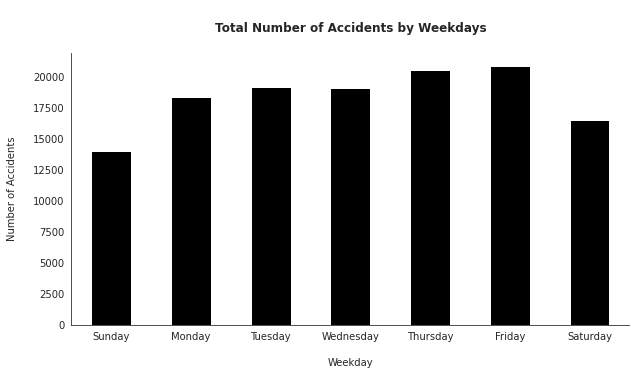

In [ ]:
# define labels by accessing look up dictionary above
labels_weekday = tuple({
    1:'Sunday',
    2: 'Monday',
    3:'Tuesday',
    4:'Wednesday',
    5:'Thursday',
    6:'Friday',
    7:'Saturday'
}.values())
sns.set_style('white')
#plot of number of accidents on weekdays
trainset2.groupby('day_of_week').size().plot(kind='bar', color='k', 
                                             figsize=(10, 5))
plt.xlabel('\nWeekday\n'), plt.ylabel('Number of Accidents\n')
plt.xticks(np.arange(7), labels_weekday, rotation='horizontal')
plt.title('\nTotal Number of Accidents by Weekdays\n', fontweight='bold')
sns.despine(top=True, right=True)

Accident occured the most on Fridays and Thursday and occured the least on Sunday. This could be as a result of fewer cars on the road on Sundays.

### **Descriptive Analysis for The Road Type Variable**


In [ ]:
#Descriptive statistics for the road_type Variable

#Displaying the count of categories for the Road_type Variable
trainset2['road_type'].value_counts(normalize = True).to_frame()

,road_type
single_carriageway,0.740408
dual_carriageway,0.157162
roundabout,0.063666
one_way_street,0.021207
slip_road,0.017557


From the table above, it can be seen that there are five unique categories in the road_type variable and approximately 74% of accidents occurs on single carriage ways.

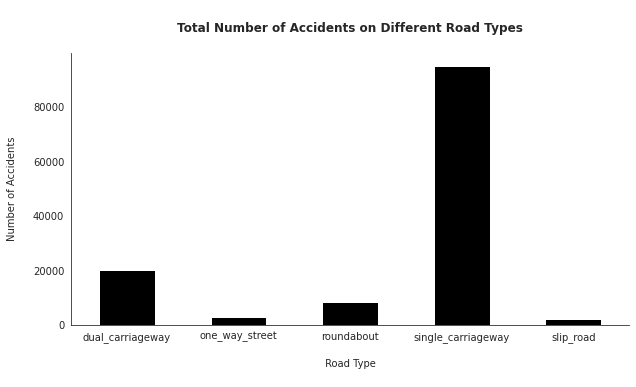

In [ ]:
#plot of number of accidents on road_types
trainset2.groupby('road_type').size().plot(kind='bar', color = 'k', 
                                           figsize=(10, 5))
plt.xlabel('\n Road Type \n'), plt.ylabel('Number of Accidents\n')
plt.xticks(rotation='horizontal')
plt.title('\nTotal Number of Accidents on Different Road Types\n', 
          fontweight='bold')
sns.despine(top=True, right=True)

The graph shows that single-carriageway roads have had the highest number of accidents. On the other side, there are somewhat fewer than 20000 cases on dual carriageways. Additionally, about the same amount of incidents are discovered on one-way streets and slip roads.

### **Descriptive Analysis for The Pedestrian Crossing Physical Facilities  Variable**


In [ ]:
#Descriptive statistics for the pedestrian_crossing_physical_facilities Variable

#Displaying the count of categories for the 
#pedestrian_crossing_physical_facilities Variable
trainset2['pedestrian_crossing_physical_facilities'].value_counts(
    normalize = True).to_frame()

,pedestrian_crossing_physical_facilities
no_crossing_facilities,0.777055
pedestrian_phase,0.083083
non_junction_crossing,0.069340
zebra,0.042460
central_refuge,0.025736
footbridge,0.002327


From the table above, it can be seen that there are six unique categories in the pedestrian_crossing_physical_facilities variable and approximately 78% of accidents occurs when there are no crossing facilities.

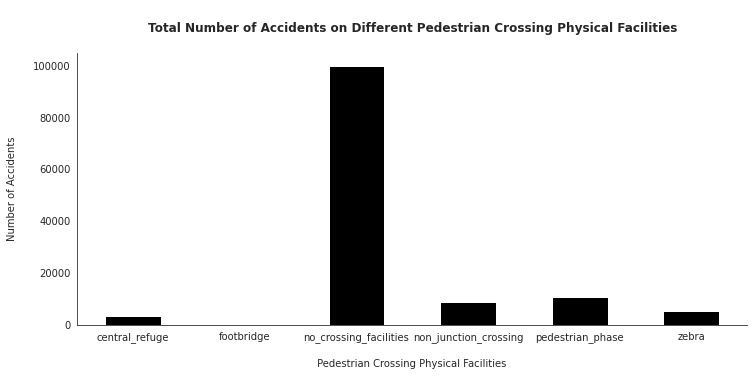

In [ ]:
#plot of number of accidents on pedestrian_crossing_physical_facilities
trainset2.groupby('pedestrian_crossing_physical_facilities').size().plot(
    kind='bar', color = 'k', figsize=(12, 5))
plt.xlabel('\n Pedestrian Crossing Physical Facilities \n'), 
plt.ylabel('Number of Accidents\n')
plt.xticks(rotation='horizontal')
plt.title(
    '\nTotal Number of Accidents on Different Pedestrian Crossing Physical Facilities\n', 
    fontweight='bold')
sns.despine(top=True, right=True)

It is evident that a lot of accidents occured on road with no crossing facilities. The least accidents occured on footbridges.

### **Descriptive Analysis for The Weather Conditions Variable**




In [ ]:
#Descriptive statistics for the weather_conditions Variable

#Displaying the count of categories for the weather_conditions Variable
trainset2['weather_conditions'].value_counts(normalize = True).to_frame()

,weather_conditions
fine,0.834309
rainy,0.131006
other,0.027642
fog,0.004903
snow,0.002140



From the table above, it can be seen that there are five unique categories in the weather_conditions variable and approximately 83% of accidents occurs on days with fine weather.

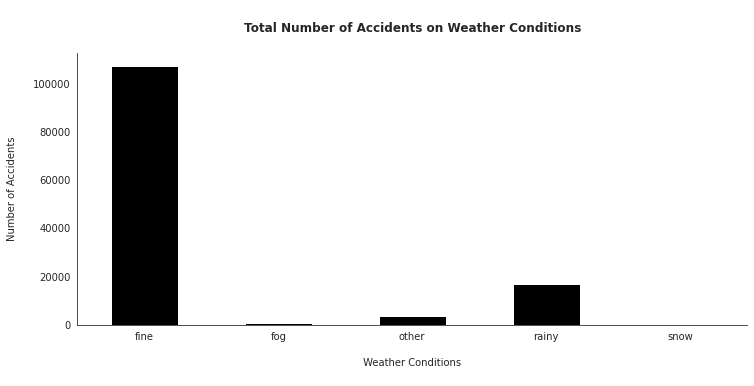

In [ ]:
#plot of number of accidents on weather_conditions
trainset2.groupby('weather_conditions').size().plot(kind='bar', color = 'k', 
                                                    figsize=(12, 5))
plt.xlabel('\n Weather Conditions \n'), plt.ylabel('Number of Accidents\n')
plt.xticks(rotation='horizontal')
plt.title('\nTotal Number of Accidents on Weather Conditions\n',
          fontweight='bold')
sns.despine(top=True, right=True)

Accidents occurs the most in fine weather. The least accidents in the data set occured in the snow. Lots of accidents also occured in the rain.

### **Descriptive Analysis for The Road Surface Conditions Variable**


In [ ]:
#Descriptive statistics for the road_surface_conditions Variable

#Displaying the count of categories for the road_surface_conditions Variable
trainset2['road_surface_conditions'].value_counts(normalize = True).to_frame()

,road_surface_conditions
dry,0.734696
wet,0.256502
frost,0.007455
flood,0.001346


From the table above, it can be seen that there are four unique categories in the road_surface_conditions variable and approximately 73% of accidents occurs on dry roads.


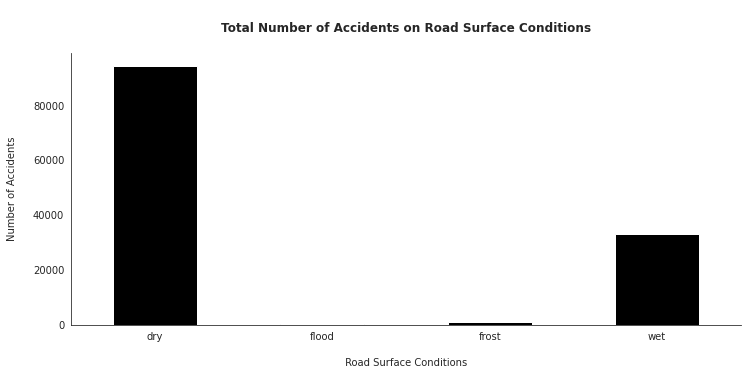

In [ ]:
#plot of number of accidents on road_surface_conditions
trainset2.groupby('road_surface_conditions').size().plot(kind='bar', color = 'k', 
                                                         figsize=(12, 5))
plt.xlabel('\n Road Surface Conditions \n'), plt.ylabel('Number of Accidents\n')
plt.xticks(rotation='horizontal')
plt.title('\nTotal Number of Accidents on Road Surface Conditions\n', 
          fontweight='bold')
sns.despine(top=True, right=True)

It is evident little accident took place on floody road, while a high amount of cases were observed on dry road.

###**Descriptive Analysis for the urban_or_rural_area Variable**



In [ ]:
#Descriptive statistics for the urban_or_rural_area Variable

#Displaying the count of categories for the urban_or_rural_area Variable
trainset2['urban_or_rural_area'].value_counts(normalize = True).to_frame()

,urban_or_rural_area
urban,0.675178
rural,0.324822


From the table above, it can be seen that approximately 67.5% of accidents occurs in urban areas.


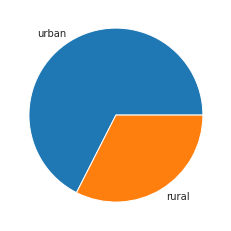

In [ ]:
#plot of number of accidents on road_surface_conditions
plt.pie(trainset2['urban_or_rural_area'].value_counts(), labels = 
        trainset2['urban_or_rural_area'].unique())
plt.show()

From the chart above, it can be seen that over 67% of cases were found in urban area. This could be as a result of more cars in the urban regions.

###**Descriptive Analysis for the Driver's Gender Variable**

In [ ]:
#Descriptive statistics for the sex_of_driver Variable

#Displaying the count of categories for the sex_of_driver Variable
trainset2['sex_of_driver'].value_counts(normalize = True).to_frame()

,sex_of_driver
male,0.636734
female,0.251156
other,0.112111


From the table we can see that male drivers are involved in more accidents than female drivers or drivers of other genders.

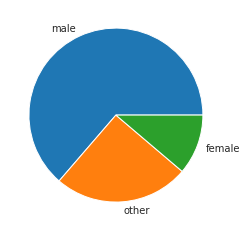

In [ ]:
#plot of number of accidents on sex_of_driver
plt.pie(trainset2['sex_of_driver'].value_counts(), labels = 
        trainset2['sex_of_driver'].unique())
plt.show()

It is evident in the plot that most of the accident occured with men being the driver of the vehicle. The number of unknown gender in the dataset is a lot.

### **Descriptive Analysis for the Time Category Variable**

In [ ]:
#Descriptive statistics for the time_category Variable

#1 represents Morning
#2 represent Afternoon
#3 represents Evening
#4 represents Night
#Displaying the count of categories for the time_category Variable
trainset2['time_category'].value_counts(normalize = True).to_frame()

,time_category
2,0.384527
1,0.331803
3,0.199731
4,0.083939


From the table above, the time period with the highest number of accidents is the Afternoon from 12:00pm - 4:59pm

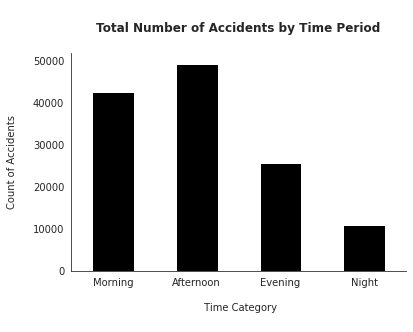

In [ ]:
# define labels by accessing look up dictionary above
labels = tuple({
    1: 'Morning',
    2: 'Afternoon',
    3: 'Evening',
    4: 'Night'
}.values())
# plot total no. of accidents by daytime
trainset2.groupby('time_category').size().plot(kind='bar', color='k')
plt.xlabel('\n Time Category\n'), plt.ylabel('Count of Accidents\n')
plt.xticks(np.arange(4), labels, rotation='horizontal')
plt.title('\nTotal Number of Accidents by Time Period\n', fontweight='bold')
sns.despine(top=True, right=True);


From the graph above, most of the accident occur in the afternoon and fewer accidents occured in the night when the number of cars on the road are reduced.

### **Descriptive Analysis for the Number of Accidents Variable**

In [ ]:
#Displaying the count of categories for the time_category Variable
trainset.describe()['no_of_accidents'].to_frame()

,no_of_accidents
count,289.000000
mean,444.629758
std,146.192622
min,86.000000
25%,348.000000
50%,460.000000
75%,548.000000
max,784.000000


From the above table it is seen that the minimum value for number of accidents in a day is 86 and the maximum value is 784.
Since the values of the mean and the median are close, we can infer that the number of accidents in a day has a symmetrical distribution.

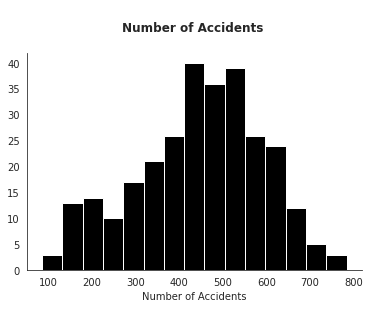

In [ ]:
#plotting a histogram showing the distribution of number of accidnets in 
#the training dataset
plt.hist(trainset['no_of_accidents'],color = 'k', bins = 15)
plt.xlabel('Number of Accidents\n '), plt.ylabel('')
plt.xticks(rotation='horizontal')
plt.title('\nNumber of Accidents \n', fontweight='bold')
sns.despine(top=True, right=True)

plt.show()


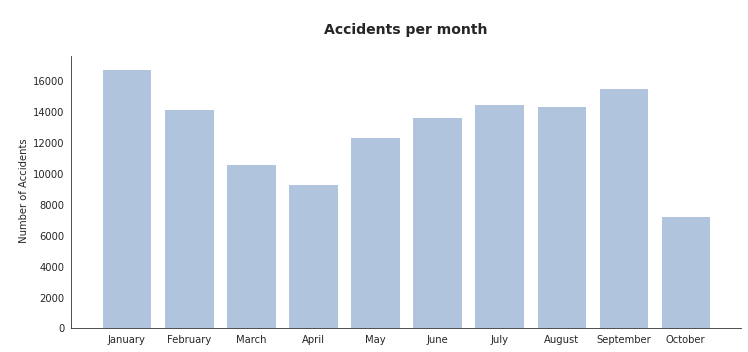

In [ ]:
monthly_count = trainset2['date'].dt.month.value_counts().sort_index(ascending=True)

# prepare plot
fig, ax = plt.subplots(figsize=(12,5))
# plot
monthly_count.index = ['January','February','March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October']
ax.bar(monthly_count.index, monthly_count.values, color='lightsteelblue')
ax.set_title('\nAccidents per month\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\n Number of Accidents')

# remove all spines
sns.despine(ax=ax, top=True, right=True);

The number of accidents decreased from February to April beause of the lockdowns enforced by the UK government to reduce the spread of COVID-19. 
The numbers started to rise again in may, when the lockdown was lifted. It dropped again in october because data for that month is split between training and testing set.

### **Distribution Of Numerical Variables in the Accident Severity Data**

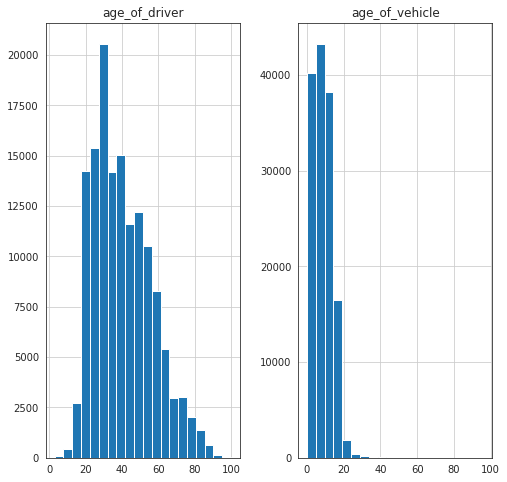

In [ ]:
#plots of the numerical variables in the accident severity trainset
dummy = trainset_sev2[['age_of_driver', 'age_of_vehicle']].hist(bins=20, figsize=(8,8))

The distribution of the age_of_vehicle variable is right-skewed and the distribution for age_of_driver is almost normally distributed.

### **Distribution Of categorical Variables in the Accident Severity Data**

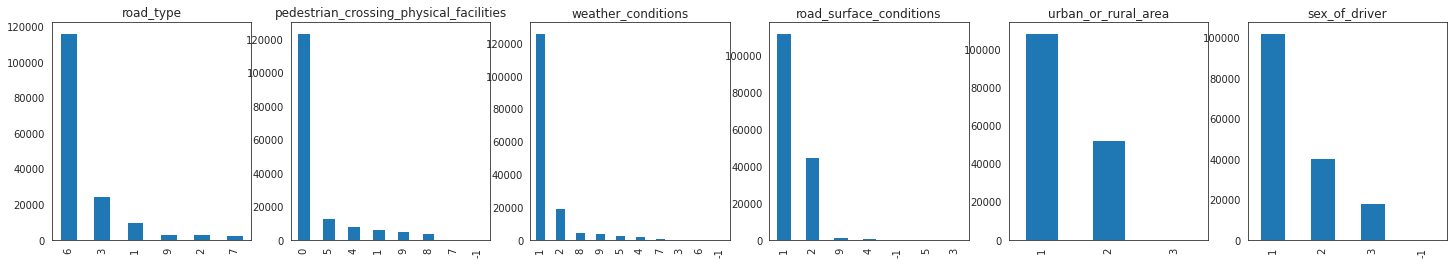

In [ ]:
#plots of the categorical variables in the accident severity trainset
trainsev2 = trainset_sev2.drop(['high_wind', 'time'], axis = 1)
categorical_features = trainsev2.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(1, len(categorical_features), figsize=(25, 4))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

## **Variable Correlations**

The correlations between the independent variables and dependent variables for the trainset for predicting the number of accidents in a day is shown below.

In [ ]:
corr_matrix = trainset.corr()
corr_matrix['no_of_accidents'].sort_values(ascending=False)

no_of_accidents           1.000000
female                    0.649099
1                         0.412664
dual_carriageway          0.343997
wet                       0.305787
frost                     0.254730
zebra                     0.208427
rainy                     0.187951
slip_road                 0.143605
flood                     0.109879
snow                      0.103154
footbridge                0.090301
non_junction_crossing     0.049231
fog                       0.042181
one_way_street           -0.028572
no_high_wind             -0.033396
pedestrian_phase         -0.036254
day_of_week              -0.050850
no_crossing_facilities   -0.053232
3                        -0.144949
central_refuge           -0.150561
4                        -0.166662
urban_area               -0.175956
other                    -0.176738
fine                     -0.194643
single_carriageway       -0.216202
roundabout               -0.227326
2                        -0.284090
dry                 

The correlation of the independent variables with the dependent variable is shown above. The variable with the highest correlation to the number of accidents is "female". The 'male' variable is highly negative correlated. This means that the higher the proportion of female drivers on the road, the hghewr the number of accidents and the higher the proportion of male drivers, the lower the number of accidents.

This shows that being a female or male will be important in predicting the number of accidents that will occur in the day. Other variables that may have some effect on the number of accidents in the day are morning, dual_carriageway, wet, frost, zebra, single_carriageway, roundabout, afternoon and dry.

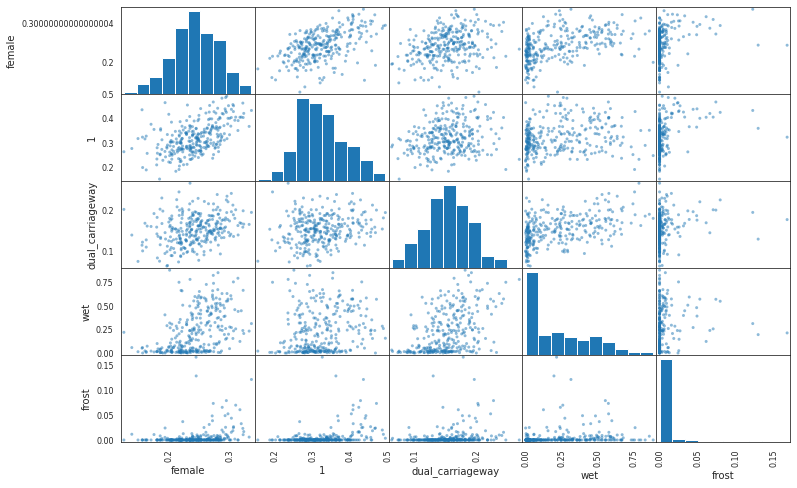

In [ ]:
# select only the variables that are most likely to be positively correlated
attributes = ['female', 1 , 'dual_carriageway', 'wet', 'frost']
dummy = scatter_matrix(trainset[attributes], figsize=(12, 8))

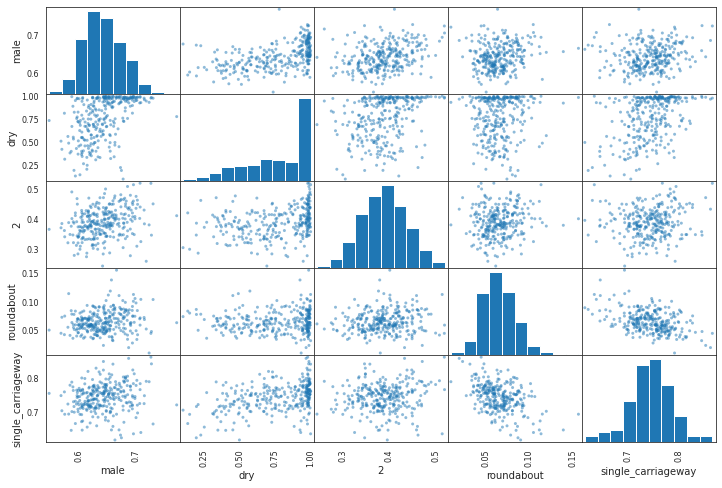

In [ ]:
# select only the variables that are most likely to be negatively correlated
attributes2 = ['male', 'dry',  2, 'roundabout', 'single_carriageway']
dummy = scatter_matrix(trainset[attributes2], figsize=(12, 8))

# **Copying the data**

In [ ]:
trainset.to_csv('/content/drive/MyDrive/trainset.csv')
testset.to_csv('/content/drive/MyDrive/testset.csv')
trainset_sev.to_csv('/content/drive/MyDrive/trainsetsev.csv')
testset_sev.to_csv('/content/drive/MyDrive/testsetsev.csv')